Instalacion de librerias adicionales al entorno de colaboratory

In [ ]:
!pip install ezdxf
!pip install geopandas

Código fuente para la lectura del Autocad inicial, donde se separan los pilares originales y los de área tributaria

In [ ]:
import sys
import math
import ezdxf
import pandas as pd
import numpy as np
import geopandas as geo
from shapely.geometry import *



doc = ezdxf.readfile("Ejercicio_Inicio.dxf")


lista_eje_x = []
lista_eje_y = []
lista_start_width = []
lista_end_width = []
lista_bulge = []
lista_polilinea = []
distancias = []
capa_polilinea = []


msp = doc.modelspace()

for e in msp:
    if e.dxftype() == "LWPOLYLINE":
        print("la", e, "tiene",len(e), "segmentos de rectas")
        i = 0
        while i < len(e):
            if i == 0:
                distancias.append(0)
            else:
                distancias.append(math.dist([e[i-1][0] ,e[i-1][1] ], [ e[i][0] ,e[i][1] ]))
            print(e[i])
            lista_polilinea.append(e)
            lista_eje_x.append(e[i][0])
            lista_eje_y.append(e[i][1])
            lista_start_width.append(e[i][2])
            lista_end_width.append(e[i][3])
            lista_bulge.append(e[i][4])
            capa_polilinea.append(e.dxf.layer)
            i = i + 1 
    datos = pd.DataFrame(data = {"polilinea": lista_polilinea, "x": lista_eje_x, 
                                 "y": lista_eje_y, "capa": capa_polilinea})

    datos.to_excel("Datos de acad ver 777.xlsx", sheet_name= "polilineas")
    
elemento_unicos = []
for i in lista_polilinea:
    if i not in elemento_unicos:
        elemento_unicos.append(i)
        
print(elemento_unicos)
print(len(elemento_unicos))

nombre_gen = []
x_gen = []
y_gen = []
capa_gen = []
puntos_gen = []

i = 0
while i < len(elemento_unicos):
    z = 0
    nombre = []
    x = []
    y = []
    capa = []
    puntos = []
    data_1 = datos[datos["polilinea"] == elemento_unicos[i]]
    while z < len(data_1):
        nombre.append(data_1.iloc[z, 0])
        x.append(data_1.iloc[z, 1])
        y.append(data_1.iloc[z, 2])
        capa.append(data_1.iloc[z, 3])
#        punto = list(zip(x, y))
#        puntos.append(punto)
        z = z + 1
    punto = list(zip(x,y))
    nombre_gen.append(nombre)
    x_gen.append(x)
    y_gen.append(y)
    capa_gen.append(capa)
    puntos_gen.append(punto)
    i = i + 1

print(nombre_gen)
print(x_gen)
print(y_gen)
print(capa_gen)
print(len(puntos_gen))
print(puntos_gen[0])



lista_nombre = []
i = 0
while i < len(nombre_gen):
    lista_nombre.append(nombre_gen[i][0])
    i = i + 1
    
lista_capa = []
i = 0
while i < len(capa_gen):
    lista_capa.append(capa_gen[i][0])
    i = i + 1

print(lista_nombre)
print(lista_capa)


############ creacion de poligonos ############



i = 0
lista_polygon = []
lista_centroide = []
lista_area = []
lista_perimetro = []
while i < len(lista_nombre):
    s1 = Polygon(puntos_gen[i])
    lista_area.append(s1.area)
    lista_centroide.append(s1.centroid)
    lista_polygon.append(s1)
    lista_perimetro.append(s1.length)
    i = i + 1
    
#print(polygon)
print(lista_area)

data = geo.GeoDataFrame({"nombre": lista_nombre, "polygon": lista_polygon, "capa": lista_capa, "area": lista_area, 
                         "centroide": lista_centroide, "perimetro" : lista_perimetro})
data.to_excel("polygonos a lo fino.xlsx")




####################################################################################
data_dios = pd.DataFrame(columns = ["nombre x", "capa x", "area x", "nombre y", "capa y", "area y",
                                    "distancia"])
lista_distancias_geo = []
lista_nombres_geo = []

z = 0
while z < len(data):
    lista_distancias = []
    lista_nombres = []
    lista_x = []
    lista_y = []
    lista_x_capa = []
    lista_y_capa = []
    lista_x_area = []
    lista_y_area = []
    lista_x_perimetro = []
    lista_y_perimetro = []
    i = 0
    while i < len(data):
        dista = (data.iloc[z, 4]).distance(data.iloc[i, 4])
        lista_distancias.append(dista)
        x = data["nombre"][z]
        y = data["nombre"][i]
        nombre = list([str(x), str(y)])
        lista_nombres.append(nombre)
        lista_x.append(x)
        lista_y.append(y)
        ##################################
        lista_x_capa.append(data["capa"][z])
        lista_y_capa.append(data["capa"][i])
        lista_x_area.append(data["area"][z])
        lista_y_area.append(data["area"][i])
        lista_x_perimetro.append(data["perimetro"][z])
        lista_y_perimetro.append(data["perimetro"][i])
 #       data = pd.DataFrame({"nombre": nombre, "distancia": lista_distancias})
        i = i + 1
 #   datagene.append([nombre, dista])
    data_refe = pd.DataFrame({"nombre x": lista_x, "capa x": lista_x_capa ,"area x": lista_x_area,
                              "nombre y": lista_y, 
                              "capa y": lista_y_capa,
                              "area y": lista_y_area, "distancia": lista_distancias, "perimetro x": lista_x_perimetro, "perimetro y": lista_y_perimetro })
    data_filtro = data_refe[data_refe["nombre y"] != x]
    valor = data_filtro["distancia"].min()
    fila_min = data_filtro[data_filtro["distancia"] == valor]
    data_dios = pd.concat([data_dios, fila_min])
    
    lista_distancias_geo.append(lista_distancias)
    lista_nombres_geo.append(lista_nombres)
    z = z + 1

print(lista_distancias_geo)
print(lista_nombres_geo)
print(lista_x)
print(len(lista_x))
print(lista_y)
print(len(lista_y))
print(lista_distancias)
print(len(lista_distancias))
print(data_refe)
print(data_filtro)
print(valor)
print(fila_min)

print(data_dios)
data_dios.to_excel("resultados finales.xlsx")

#############################################################
data_final = data_dios

data_final_2 = data_final[data_final["capa y"] == "Pilares_Ejemplo"]

print(data_final_2)


data_resumen = pd.DataFrame({"pilar": data_final_2["nombre x"], 
                             "tipo de pilar": data_final_2["capa x"], 
                             "Área": data_final_2["area x"], 
                             "Área Tributaria": data_final_2["area y"], "perimetro": data_final_2["perimetro x"]})

print(data_resumen)

data_resumen["At/Ap"] = data_resumen["Área Tributaria"]/data_resumen["Área"]

print(data_resumen)

data_resumen.to_excel("resultados de los datos4.xlsx")



data_resumen es un dataframe que contiene la información de todos los pilares que existan en el archivo CAD, segmentados segun su tipo de pilar, entre otras caracteristicas

In [3]:
data_resumen

,pilar,tipo de pilar,Área,Área Tributaria,perimetro,At/Ap
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,93.344262,1.589128
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,84.327467,1.560104
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,86.614391,1.514331
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,84.840034,1.591745


In [4]:
altura = float(input("ingresa la altura del pilar en metros: "))
data_resumen["Altura"] = altura

ingresa la altura del pilar en metros: 4.3


In [5]:
data_resumen

,pilar,tipo de pilar,Área,Área Tributaria,perimetro,At/Ap,Altura
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,93.344262,1.589128,4.3
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,84.327467,1.560104,4.3
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,86.614391,1.514331,4.3
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,84.840034,1.591745,4.3


In [6]:
data_resumen2 = data_resumen.copy()

Lectura del excel que contiene las propiedad geomecanicas de CMET y PDI

In [7]:
prop_geo = pd.read_excel("/content/propiedades geomecanicas.xlsx")

In [8]:
prop_geo

,Litologia,Sigma Ci,mi,GSI
0,CMET,124,12.0,74
1,PDI,145,18.6,86


In [9]:
x = data_resumen2
y = prop_geo


lista_sigma_ci = []
lista_mi = []
lista_gsi = []


for i in x["tipo de pilar"]:
  if i == "CMET":
    HOLA = y[y["Litologia"] == "CMET"]
    lista_sigma_ci.append(HOLA.iloc[0,1])
    lista_mi.append(HOLA.iloc[0, 2])
    lista_gsi.append(HOLA.iloc[0, 3])


  if i == "PDI":
    HOLA = y[y["Litologia"] == "PDI"]
    lista_sigma_ci.append(HOLA.iloc[0,1])
    lista_mi.append(HOLA.iloc[0, 2])
    lista_gsi.append(HOLA.iloc[0, 3])
    
x["Sigma_ci"] = lista_sigma_ci
x["mi"] = lista_mi
x["GSI"] = lista_gsi


x es un dataframe que contiene toda la informacion importante acerca de la geometria de cada pilar, asi como de las caracteristicas geomecánicas

In [10]:
x

,pilar,tipo de pilar,Área,Área Tributaria,perimetro,At/Ap,Altura,Sigma_ci,mi,GSI
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,93.344262,1.589128,4.3,124,12.0,74
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,84.327467,1.560104,4.3,124,12.0,74
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,86.614391,1.514331,4.3,145,18.6,86
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,84.840034,1.591745,4.3,145,18.6,86


##Nuestro x es nuestra tabla final 

In [11]:
esf_v = float(input("ingrese el valor del esfuerzo vertical en MPa: "))
x["esfuerzo vertical"] = esf_v

ingrese el valor del esfuerzo vertical en MPa: 50


In [12]:
x

,pilar,tipo de pilar,Área,Área Tributaria,perimetro,At/Ap,Altura,Sigma_ci,mi,GSI,esfuerzo vertical
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,93.344262,1.589128,4.3,124,12.0,74,50.0
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,84.327467,1.560104,4.3,124,12.0,74,50.0
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,86.614391,1.514331,4.3,145,18.6,86,50.0
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,84.840034,1.591745,4.3,145,18.6,86,50.0


In [13]:
x["Radio Hidráulico"] = x["Área"]/x["perimetro"]

factor_perturbacion = float(input("ingrese el factor de perturbacion por tronadura: ")) ## valor por defecto de d es 0

x["D"] = factor_perturbacion 

ingrese el factor de perturbacion por tronadura: 0.


In [14]:
x["ancho efectivo"] = 4*x["Radio Hidráulico"]
x["esbeltez minera"] = x["ancho efectivo"]/x["Altura"]
x["razón alto ancho"] = 1/x["esbeltez minera"]
x["mb"] = x["mi"] * np.exp((x["GSI"]-100)/(28-(14*x["D"])))
x["s"] = np.exp((x["GSI"]-100)/(9-(3*x["D"])))
x["a"] = 0.5 + ( (1/6)* (np.exp(-1*(x["GSI"]/15) ) - np.exp(-20/3 )) )
x["sigma aplicado"] = x["esfuerzo vertical"]*x["At/Ap"]
x["sigma 3"] = x["sigma aplicado"]*(-0.15267211+(0.22690402/(np.sqrt(x["razón alto ancho"]))))
x["sigma maximo"] = x["sigma 3"]+ ( x["Sigma_ci"]* (np.power(( x["mb"]*(x["sigma 3"]/x["Sigma_ci"]) )+ x["s"], x["a"])))
x["factor de seguridad"] = x["sigma maximo"]/ x["sigma aplicado"]

In [15]:
x.to_excel("resultados finales finales 2.xlsx")

##Extracción de la informacion al ACAD
en las siguientes lineas se presenta el proceso de extracion de la informacion que existe en x, para crear al CAD que visualmente representara la solución

In [74]:
resultados = x.copy()

In [17]:
resultados

,pilar,tipo de pilar,Área,Área Tributaria,perimetro,At/Ap,Altura,Sigma_ci,mi,GSI,...,ancho efectivo,esbeltez minera,razón alto ancho,mb,s,a,sigma aplicado,sigma 3,sigma maximo,factor de seguridad
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,93.344262,1.589128,4.3,124,12.0,74,...,16.179484,3.762671,0.265769,4.741413,0.055638,0.500988,79.456377,22.841113,142.350553,1.791556
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,84.327467,1.560104,4.3,124,12.0,74,...,18.242666,4.242481,0.235711,4.741413,0.055638,0.500988,78.005221,24.547347,148.190244,1.899748
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,86.614391,1.514331,4.3,145,18.6,86,...,18.297856,4.255315,0.235000,11.281470,0.211072,0.500327,75.716545,23.880614,232.501618,3.070684
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,84.840034,1.591745,4.3,145,18.6,86,...,17.772014,4.133026,0.241953,11.281470,0.211072,0.500327,79.587263,24.562243,235.841701,2.963310


resultados_2 es un dataframe que contiene las 3 columnas mas importante donde se evaluara el tipo de pilar, sus coordenadas y el factor de seguridad

In [18]:
resultados_2 = resultados[["pilar", "tipo de pilar", "factor de seguridad"]]

In [19]:
resultados_2

,pilar,tipo de pilar,factor de seguridad
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,1.791556
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,1.899748
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,3.070684
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,2.963310


In [20]:
resultados_2.to_excel("resultados_2.xlsx")

##proceso de creacion del CAD

In [21]:
###### Creacion del codigo para las coordenadas de cada polilinea ######
#####################################################
#####################################################

i = 0
polilineas = []
centroides = []
while i < len(resultados_2):
  lista_x = []
  lista_y = []
#  lista_centroides = []
  largo = len(resultados_2.iloc[i, 0])
  z = 0
  while z < largo: 
    lista_x.append(resultados_2.iloc[i, 0][z][0]) ### apendiza a la lista la coor X
    lista_y.append(resultados_2.iloc[i, 0][z][1]) ### apendiza a la lista la coor Y 

    z = z + 1
  lista_zip = list(zip(lista_x, lista_y))
  print("la lista zip es:")
  print(lista_zip)
  polilineas.append(lista_zip)
  p = Polygon(lista_zip)
  centroide = p.centroid
  centroides.append(centroide)
  i = i + 1


la lista zip es:
[(509.8859767648045, 1054.974992662914), (511.6852814580442, 1054.492870423423), (514.3077310512662, 1044.706767791123), (514.2811999999999, 1044.6241), (514.3128000000002, 1043.5321), (514.8180000000002, 1041.6509), (515.2995, 1040.2495), (515.0469, 1039.896), (514.6442000000002, 1039.6444), (513.2782000000002, 1039.541), (511.9540999999999, 1038.4999), (510.8260999999999, 1037.0005), (509.5813, 1036.1433), (508.9153000000001, 1034.9556), (507.9313999999999, 1033.8982), (495.0768858270658, 1021.383262555414), (494.0856738354364, 1021.648857008099), (493.1541652385815, 1025.125245085296), (496.2563389723682, 1025.956470032046), (495.324590409999, 1029.433803006686), (492.2224043393835, 1028.602574754293), (491.0568679577127, 1032.952354020378), (492.2257810052287, 1037.314796903339)]
la lista zip es:
[(515.7068386864775, 1058.02599288885), (516.7206784320869, 1061.809694330196), (535.2294023290851, 1080.318418227193), (536.2113040078156, 1080.055318465331), (536.702400

Estandarización de los valores del factor de seguridad para poder crear la escalas de colores para la visualización de cada pilar en el archivo CAD

In [22]:
fs = resultados_2["factor de seguridad"].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (10,170)) ### valores importantes para el escalado de la variable FS

trans_fs = scaler.fit_transform(fs.reshape(-1, 1))

trans_fs_round = trans_fs.round(-1)

In [24]:
trans_fs_round

array([[ 10.],
       [ 20.],
       [170.],
       [160.]])

##con escala de color segun la configuracion ACI

In [26]:


###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  hatch = msp.add_hatch(color= float(trans_fs_round[i]), ) ### AJUSTAR LOS COLORES
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1, dxfattribs={"style": "LiberationSerif"}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1

doc.saveas("AUTOCAD DE SALIDA 3.dxf")



##con escala rgb

In [24]:
fs = resultados_2["factor de seguridad"].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 252)) ### valores importantes para el escalado de la variable FS

trans_fs = scaler.fit_transform(fs.reshape(-1, 1))

trans_fs_round = trans_fs.round(0)

In [25]:
trans_fs_round

array([[  0.],
       [ 21.],
       [252.],
       [231.]])

In [26]:
trans_fs_round[0]

array([0.])

In [53]:
hatch = msp.add_hatch(color = 2)

In [38]:
hatch.set_dxf_attrib("color", 1)

In [43]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  c = ezdxf.colors.rgb2int((255, int(trans_fs[i]), 0))
  hatch = msp.add_hatch(color= c ) ### AJUSTAR LOS COLORES
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1.5, dxfattribs={"style": "LiberationSerif"}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("beto 3.dxf")

escala rgb

In [28]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  c = ezdxf.colors.rgb2int((255, int(trans_fs[i]), 0))
  hatch = msp.add_hatch() ### AJUSTAR LOS COLORES
  dd = int(trans_fs_round[i])
  hatch.rgb = (219, dd, 70)
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1.5, dxfattribs={"style": "LiberationSerif", "color": 182}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("toty 3.dxf")

#:s **Programa de salida definitivo **

## escala hsl a rbg

In [132]:
fs = resultados_2["factor de seguridad"].values

In [133]:
fs

array([1.79155604, 1.89974777, 3.07068444, 2.96330961])

In [134]:
fs.max()

3.0706844422941146

creacion de la nueva escala usando sklearn para la regresion lineal con una escala del fs entre 0 (color rojo) y el maximo valor del fs (azul) pasando por el color moradito

In [136]:
escala_real_fs = np.array([0, fs.max()])

In [141]:
### modelo de regresion lineal para que el color azul sea el fs mas alto y el rojo el fs mas bajo

from sklearn.linear_model import LinearRegression
X = escala_real_fs
Y = np.array([355, 240])
modelo = LinearRegression()
modelo.fit(X = X.reshape(-1, 1), y = Y)



LinearRegression()

In [155]:
modelo.predict(fs[0].reshape(-1, 1))

array([287.90455308])

In [151]:
valor = np.array([3.0706844422941146])
resultado = modelo.predict(valor.reshape(-1, 1))
entero_resultado = int(resultado.round(0))
print(entero_resultado)



240


In [131]:
escala_real_fs

array([0.        , 3.07068444])

In [125]:
fs = resultados_2["factor de seguridad"].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (240, 359)) ### valores importantes para el escalado de la variable FS

trans_fs = scaler.fit_transform(escala_real_fs.reshape(-1, 1))

trans_fs_real = scaler.transform(fs.reshape(-1, 1))


In [121]:
trans_fs_real_round = trans_fs_real.round(0)

In [122]:
trans_fs_real_round

array([[309.],
       [314.],
       [359.],
       [355.]])

In [116]:
trans_fs_real_round

array([[309.],
       [314.],
       [359.],
       [355.]])

In [ ]:
### el L se divide entre 100
### el S se divide entre 100
### el H se divide entre 359

In [58]:
h = 126/359
l = 50/100
s = 100/100
rgb = colorsys.hls_to_rgb(h, l, s)

In [68]:
r = rgb[0]*255
g = rgb[1]*255
b = rgb[2]*255
r = int(round(r, 0))
g = int(round(g, 0))
b = int(round(b, 0))

In [69]:
r, g, b

(0, 255, 27)

In [61]:
r,g,b

(0.0, 255.0, 26.991643454038986)

In [56]:
0.1058495821727019*255

26.991643454038986

In [51]:
126/0.3509803921568628

358.9944134078212

In [48]:
colorsys.hls_to_rgb(275/359, 50/50, 100/100)

(1.0, 1.0, 1.0)

### HLS A RGB 

In [156]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
import colorsys



doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  c = ezdxf.colors.rgb2int((255, int(trans_fs_round[i]), 0))
  hatch = msp.add_hatch() ### AJUSTAR LOS COLORES
  #### escalado de la variable fs a hls (H)
  resultado = modelo.predict(fs[i].reshape(-1, 1))
  dd = int(resultado.round(0))
  #### colores #####
#  dd = int(trans_fs_round[i])
  h = dd/359
  l = 50/100
  s = 100/100
  rgb = colorsys.hls_to_rgb(h, l, s)
  r = rgb[0]*255
  g = rgb[1]*255
  b = rgb[2]*255
  r = int(round(r, 0))
  g = int(round(g, 0))
  b = int(round(b, 0))
  hatch.rgb = (r, g, b)
  ##### colores #####
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  mtext = msp.add_mtext(("FS :", str(c.round(3))), dxfattribs={"style": "OpenSans_Narrow", "color": 5}) ### color y estilo de la letra
  mtext.dxf.char_height = 1
  mtext.set_bg_color(7, scale=1.5) ### color de fondo 
  mtext.set_location(attachment_point = 5, insert = (d.x, d.y))  ### el 5 es que esta centrado y el insert es la ubicacion del texto


#  msp.add_text(("FS :", str(c.round(3))), height= 1.5, dxfattribs={"style": "LiberationSerif", "color": 182}
#               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
### agregar la leyenda ####
doc.saveas("sebita 1.dxf")

### FINAL DEL PROGRAMA

###############################################################################################################################################################################################################################################################################################################################

In [46]:
entity.dxf.true_color = ezdxf.colors.rgb2int(255, 128, 16)

TypeError: ignored

##creacion del autocad con colores y texto BONITOS 

In [67]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  c = ezdxf.colors.rgb2int((255, int(trans_fs[i]), 0))
  hatch = msp.add_hatch() ### AJUSTAR LOS COLORES
  dd = int(trans_fs_round[i])
  hatch.rgb = (255, dd, 0)
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  mtext = msp.add_mtext(("FS :", str(c.round(3))), dxfattribs={"style": "OpenSans_Narrow", "color": 5}) ### color y estilo de la letra
  mtext.dxf.char_height = 1
  mtext.set_bg_color(7, scale=1.5) ### color de fondo 
  mtext.set_location(attachment_point = 5, insert = (d.x, d.y))  ### el 5 es que esta centrado y el insert es la ubicacion del texto


#  msp.add_text(("FS :", str(c.round(3))), height= 1.5, dxfattribs={"style": "LiberationSerif", "color": 182}
#               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("beto 14.dxf")

In [34]:
c

2.963309607936956

In [27]:
## funcion que transforma los colores de rgb a ACI 

ezdxf.colors.rgb2int((240,248,255))

15792383

In [36]:
ezdxf.colors.rgb2int((255, int(trans_fs_round[0]), 0))

16711680

In [28]:
type(ezdxf.colors.rgb2int((240,248,255)))

int

In [ ]:
(240,248,255)

### FIN DEL PROGRAMA

In [ ]:
#######################################################################################################################################

In [ ]:
lista_x = []
lista_y = []
i = 0
while i <  len(resultados_2["pilar"]):
  lista_x.append(resultados_2.iloc[i, 0][-1][0])
  lista_y.append(resultados_2.iloc[i, 0][-1][1])
  i = i + 1



In [ ]:
### valores del ultimo punto en cada polilinea
print(lista_x, lista_y)

[492.2257810052287, 515.7068388677139, 487.0494001031775, 531.5362] [1037.314796903339, 1058.025993565233, 1056.633313429124, 1082.6358]


In [ ]:
ultimas_coor = list(zip(lista_x, lista_y))

In [ ]:
ultimas_coor

[(492.2257810052287, 1037.314796903339),
 (515.7068388677139, 1058.025993565233),
 (487.0494001031775, 1056.633313429124),
 (531.5362, 1082.6358)]

In [ ]:
ultimas_coor

[(492.2257810052287, 1037.314796903339),
 (515.7068388677139, 1058.025993565233),
 (487.0494001031775, 1056.633313429124),
 (531.5362, 1082.6358)]

In [ ]:
p1 = Polygon(ultimas_coor)

In [ ]:
lista_a = []
lista_b = []

for i in resultados_2["pilar"]:
  lista_a.append(resultados_2.iloc[0,0][i][0])



TypeError: ignored

In [ ]:
print(resultados_2.iloc[3, 0])

LWPOLYLINE(#2B8)


In [ ]:
a = resultados_2.iloc[0, 0]

In [ ]:
print(a[0])

(509.8859767648045, 1054.974992662914, 0.0, 0.0, 0.0)


In [ ]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  i = i + 1
doc.saveas("polilineas_de_pruebas_4.dxf")



In [ ]:
fs = resultados_2.iloc[0, 2]
print(fs.round(3))
print("el valor del factor de seguridad es:", str(fs))

1.792
el valor del factor de seguridad es: 1.7915560435026885


In [ ]:
aa = resultados_2.iloc[3, 0]
print(len(aa))

41


In [ ]:
###### Creacion del codigo para los centroides ######
#####################################################
#####################################################

i = 0
centroides = []
while i < len(resultados_2):
  lista_x = []
  lista_y = []
#  lista_centroides = []
  largo = len(resultados_2.iloc[i, 0])
  z = 0
  while z < largo: 
    lista_x.append(resultados_2.iloc[i, 0][z][0])
    lista_y.append(resultados_2.iloc[i, 0][z][1])

    z = z + 1
  lista_zip = list(zip(lista_x, lista_y))
  print("la lista zip es:")
  print(lista_zip)
  p = Polygon(lista_zip)
  centroide = p.centroid
  centroides.append(centroide)
  i = i + 1





la lista zip es:
[(509.8859767648045, 1054.974992662914), (511.6852814580442, 1054.492870423423), (514.3077310512662, 1044.706767791123), (514.2811999999999, 1044.6241), (514.3128000000002, 1043.5321), (514.8180000000002, 1041.6509), (515.2995, 1040.2495), (515.0469, 1039.896), (514.6442000000002, 1039.6444), (513.2782000000002, 1039.541), (511.9540999999999, 1038.4999), (510.8260999999999, 1037.0005), (509.5813, 1036.1433), (508.9153000000001, 1034.9556), (507.9313999999999, 1033.8982), (495.0768858270658, 1021.383262555414), (494.0856738354364, 1021.648857008099), (493.1541652385815, 1025.125245085296), (496.2563389723682, 1025.956470032046), (495.324590409999, 1029.433803006686), (492.2224043393835, 1028.602574754293), (491.0568679577127, 1032.952354020378), (492.2257810052287, 1037.314796903339)]
la lista zip es:
[(515.7068386864775, 1058.02599288885), (516.7206784320869, 1061.809694330196), (535.2294023290851, 1080.318418227193), (536.2113040078156, 1080.055318465331), (536.702400

In [ ]:
centroides

[<POINT (503.132 1038.742)>,
 <POINT (527.745 1063.51)>,
 <POINT (497.777 1058.209)>,
 <POINT (522.325 1082.547)>]

In [ ]:
a = centroides[0]
b = a.x
print(a.x)
type(b)

503.13206366890614


numpy.float64

In [ ]:
data_centroides = geo.GeoDataFrame({"centroide": centroides})

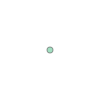

In [ ]:
data_centroides.iloc[0, 0]

TypeError: ignored

In [ ]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1, dxfattribs={"style": "LiberationSerif"}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  i = i + 1
doc.saveas("polilineas_de_pruebas_12.dxf")



#Pruebas de los colores

codigo importante que sirve para obtener las direcciones del centroide y las coordenadas de cada polilinea para el achurado con color

In [ ]:
###### Creacion del codigo para las coordenadas de cada polilinea ######
#####################################################
#####################################################

i = 0
polilineas = []
while i < len(resultados_2):
  lista_x = []
  lista_y = []
#  lista_centroides = []
  largo = len(resultados_2.iloc[i, 0])
  z = 0
  while z < largo: 
    lista_x.append(resultados_2.iloc[i, 0][z][0]) ### apendiza a la lista la coor X
    lista_y.append(resultados_2.iloc[i, 0][z][1]) ### apendiza a la lista la coor Y 

    z = z + 1
  lista_zip = list(zip(lista_x, lista_y))
  print("la lista zip es:")
  print(lista_zip)
  polilineas.append(lista_zip)
  p = Polygon(lista_zip)
  centroide = p.centroid
  centroides.append(centroide)
  i = i + 1



la lista zip es:
[(509.8859767648045, 1054.974992662914), (511.6852814580442, 1054.492870423423), (514.3077310512662, 1044.706767791123), (514.2811999999999, 1044.6241), (514.3128000000002, 1043.5321), (514.8180000000002, 1041.6509), (515.2995, 1040.2495), (515.0469, 1039.896), (514.6442000000002, 1039.6444), (513.2782000000002, 1039.541), (511.9540999999999, 1038.4999), (510.8260999999999, 1037.0005), (509.5813, 1036.1433), (508.9153000000001, 1034.9556), (507.9313999999999, 1033.8982), (495.0768858270658, 1021.383262555414), (494.0856738354364, 1021.648857008099), (493.1541652385815, 1025.125245085296), (496.2563389723682, 1025.956470032046), (495.324590409999, 1029.433803006686), (492.2224043393835, 1028.602574754293), (491.0568679577127, 1032.952354020378), (492.2257810052287, 1037.314796903339)]
la lista zip es:
[(515.7068386864775, 1058.02599288885), (516.7206784320869, 1061.809694330196), (535.2294023290851, 1080.318418227193), (536.2113040078156, 1080.055318465331), (536.702400

In [ ]:
polilineas[0]

[(509.8859767648045, 1054.974992662914),
 (511.6852814580442, 1054.492870423423),
 (514.3077310512662, 1044.706767791123),
 (514.2811999999999, 1044.6241),
 (514.3128000000002, 1043.5321),
 (514.8180000000002, 1041.6509),
 (515.2995, 1040.2495),
 (515.0469, 1039.896),
 (514.6442000000002, 1039.6444),
 (513.2782000000002, 1039.541),
 (511.9540999999999, 1038.4999),
 (510.8260999999999, 1037.0005),
 (509.5813, 1036.1433),
 (508.9153000000001, 1034.9556),
 (507.9313999999999, 1033.8982),
 (495.0768858270658, 1021.383262555414),
 (494.0856738354364, 1021.648857008099),
 (493.1541652385815, 1025.125245085296),
 (496.2563389723682, 1025.956470032046),
 (495.324590409999, 1029.433803006686),
 (492.2224043393835, 1028.602574754293),
 (491.0568679577127, 1032.952354020378),
 (492.2257810052287, 1037.314796903339)]

In [ ]:
lista_zip

[(532.2373999999999, 1083.3211),
 (532.3510000000001, 1083.5744),
 (532.6273000000001, 1084.2604),
 (532.5810000000001, 1085.48),
 (532.8787, 1086.0012),
 (533.2899999999998, 1086.9468),
 (533.7640999999998, 1088.0251),
 (534.0152999999999, 1088.6515),
 (533.9630999999999, 1088.9955),
 (533.5073999999998, 1090.032),
 (533.0570999999999, 1091.3037),
 (533.0054, 1091.626),
 (532.711, 1092.5313),
 (532.5102000000002, 1093.2808),
 (532.3393999999998, 1093.8097),
 (532.0988999999998, 1094.4675),
 (531.5113000000001, 1097.168),
 (531.3297, 1098.8932),
 (530.9339, 1099.3648),
 (530.1876, 1099.4893),
 (529.8950768252093, 1099.478990151155),
 (514.0562999999997, 1083.5414),
 (513.4294999999997, 1082.8826),
 (512.5311999999999, 1081.9673),
 (512.0324, 1081.0306),
 (511.5889999999999, 1080.2521),
 (511.1333, 1078.6348),
 (511.0495000000001, 1078.3995),
 (510.9422999999999, 1077.2384),
 (510.8439, 1076.4635),
 (511.2898999999997, 1074.8425),
 (511.4117000000001, 1074.3756),
 (511.4195999999997, 10

In [ ]:
aa = np.array(resultados_2.iloc[0,0])

In [ ]:
aa

creacion del autocad

In [ ]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  hatch = msp.add_hatch(color= 253) ### AJUSTAR LOS COLORES
  hatch.set_pattern_fill("ANSI31", scale=0.5, color = 170) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})

  mtext = msp.add_mtext(("FS :", str(c.round(3))), dxfattribs={"style": "OpenSans"}).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  mtext.set_bg_color(6, scale=1.5)

  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("AUTOCAD DE PRUEBA m text.dxf")


AttributeError: ignored

In [ ]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  hatch = msp.add_hatch(color= 253) ### AJUSTAR LOS COLORES
  hatch.set_pattern_fill("ANSI31", scale=0.5, color = 170) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1, dxfattribs={"style": "LiberationSerif"}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("AUTOCAD DE PRUEBA color 170.dxf")


estandarizado de variables para que tome los colores segun una escala

In [ ]:
resultados_2["factor de seguridad"]

7    1.791556
6    1.899748
4    3.070684
5    2.963310
Name: factor de seguridad, dtype: float64

In [ ]:
fs = resultados_2["factor de seguridad"].values

In [ ]:
fs

array([1.79155604, 1.89974777, 3.07068444, 2.96330961])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (10,170))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (10,170))

trans_fs = scaler.fit_transform(fs.reshape(-1, 1))

trans_fs_round = trans_fs.round(-1)

###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  hatch = msp.add_hatch(color= float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1, dxfattribs={"style": "LiberationSerif"}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("AUTOCAD DE PRUEBA DE COLOR VER 7.dxf")



In [ ]:
trans_fs = scaler.fit_transform(fs.reshape(-1, 1))

In [ ]:
trans_fs

array([[ 10.        ],
       [ 23.5331812 ],
       [170.        ],
       [156.56900002]])

In [ ]:
trans_fs_round = trans_fs.round(-1)

In [ ]:
trans_fs_round

array([[ 10.],
       [ 20.],
       [170.],
       [160.]])

In [ ]:
float(trans_fs_round[0])

140.0

#creacion del autocad de salida con colores y todo !!!!!!!!!

In [ ]:
###### Creacion del AUTOCAD #######
#########################################################################################
#########################################################################################
from ezdxf.enums import TextEntityAlignment
doc = ezdxf.new("R2018", setup = True)
msp = doc.modelspace()
i = 0
while i < len(resultados_2["pilar"]):
  hatch = msp.add_hatch(color= float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
#  hatch.set_pattern_fill("ANSI31", scale=0.5, color = float(trans_fs_round[i])) ### AJUSTAR LOS COLORES
  a = resultados_2.iloc[i, 0] ## busqueda de la linea 
  b = resultados_2.iloc[i, 1] ## busqueda de la capa 
  c = resultados_2.iloc[i, 2] ## valor del FS
  d = centroides[i]  ### valor de los centroides
  msp.add_lwpolyline(a, close = True, dxfattribs= {"layer": str(b)})
  msp.add_text(("FS :", str(c.round(3))), height= 1, dxfattribs={"style": "LiberationSerif"}
               ).set_placement((d.x , d.y), align=TextEntityAlignment.LEFT)
  hatch.paths.add_polyline_path(polilineas[i], is_closed=True)
  i = i + 1
doc.saveas("AUTOCAD DE PRUEBA DE COLOR VER 7.dxf")

#creacion de la leyenda

In [ ]:
ezdxf.colors.CYAN

4

In [ ]:
ezdxf.colors.rgb2int((0,0,255))

255

In [ ]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(color= 10)
hatch.set_pattern_fill("ANSI31", scale=0.5, color = 3)
# every boundary path is a 2D element
# vertex format for the polyline path is: (x, y[, bulge])
# there are no bulge values in this example
hatch.paths.add_polyline_path(lista_zip, is_closed=True)

doc.saveas("solid_hatch_version 3 color 10.dxf")

In [ ]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(color=2)

# every boundary path is a 2D element
# vertex format for the polyline path is: (x, y[, bulge])
# there are no bulge values in this example
hatch.paths.add_polyline_path(
    [(0, 0), (10, 0), (10, 10), (0, 10)], is_closed=True
)

doc.saveas("solid_hatch_polyline_path.dxf")

In [ ]:
### EXPORTACION DE LOS RESULTADOS EN FORMA DE ACAD ###
import ezdxf

doc = ezdxf.new("R2000")
msp = doc.modelspace()


i = 0
while i <len(resultados_2):
  xx = resultados_2.iloc[i, 0]
  msp.add_lwpolyline(x.append_points(resultados_2.iloc[i, 0][-1]))
  i = i + 1

doc.saveas("polilineas_prueba_1.dxf")

AttributeError: ignored

In [ ]:
datos

,polilinea,x,y,capa
0,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",509.885977,1054.974993,CMET
1,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",511.685281,1054.492870,CMET
2,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",514.307731,1044.706768,CMET
3,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",514.281200,1044.624100,CMET
4,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",514.312800,1043.532100,CMET
...,...,...,...,...
123,"[(488.6706959005538, 1036.586092404504, 0.0, 0...",488.670696,1036.586092,Pilares_Ejemplo
124,"[(488.6706959005538, 1036.586092404504, 0.0, 0...",493.847077,1017.267576,Pilares_Ejemplo
125,"[(488.6706959005538, 1036.586092404504, 0.0, 0...",518.341963,1041.762462,Pilares_Ejemplo
126,"[(488.6706959005538, 1036.586092404504, 0.0, 0...",513.165582,1061.080978,Pilares_Ejemplo


In [ ]:
datos = geo.GeoDataFrame(data = datos)

In [ ]:
datos

,pilar
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0..."
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0...."
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0..."
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)..."


In [ ]:
type(datos)

geopandas.geodataframe.GeoDataFrame

In [ ]:
datos.pilar.length

AttributeError: ignored

In [ ]:
type(datos)

geopandas.geodataframe.GeoDataFrame

In [ ]:
lista_sigma_ci

[124, 124, 145, 145]

In [ ]:
x

,pilar,tipo de pilar,Área,Área Tributaria,At/Ap,Altura,Sigma Ci,mi,GSI
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,1.589128,4.3,145,18.6,86
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,1.560104,4.3,145,18.6,86
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,1.514331,4.3,145,18.6,86
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,1.591745,4.3,145,18.6,86


In [ ]:
def agregar_geo(x, y):
  i = 0

  while i < len(x):
    if i == "CMET":
      HOLA = y[y["Litologia"] == "CMET"]
      x["Sigma Ci"] = HOLA.iloc[0,1]
      x["mi"] = HOLA.iloc[0, 2]
      x["GSI"] = HOLA.iloc[0, 3]


    if i == "PDI":
      HOLA = y[y["Litologia"] == "PDI"]
      x["Sigma Ci"] = HOLA.iloc[0,1]
      x["mi"] = HOLA.iloc[0, 2]
      x["GSI"] = HOLA.iloc[0, 3]

    i = i + 1 

  return x




In [ ]:
agregar_geo(data_resumen2, prop_geo)

,pilar,tipo de pilar,Área,Área Tributaria,At/Ap,Altura
7,"[(509.8859767648045, 1054.974992662914, 0.0, 0...",CMET,377.565490,599.99972,1.589128,4.3
6,"[(515.7068386864775, 1058.02599288885, 0.0, 0....",CMET,384.589463,599.99972,1.560104,4.3
4,"[(485.8802689305066, 1052.270056492004, 0.0, 0...",PDI,396.214405,599.99972,1.514331,4.3
5,"[(532.2373999999999, 1083.3211, 0.0, 0.0, 0.0)...",PDI,376.944562,599.99972,1.591745,4.3


In [ ]:
lista_sigma_ci

NameError: ignored

In [ ]:
agregar_geo(data_resumen2, prop_geo)

ValueError: ignored

In [ ]:
lista1 = []
lista2 = []
lista3 = []

def lectura_geomecanica(x):
  if x["tipo de pilar"] == "CMET":
    lista.append(124, 12, 74)
  if x["tipo de pilar"] == "Dacita":
    lista.append(145, 18.6, 86)
